<a href="https://colab.research.google.com/github/tabishjamal/hr-analytics-kaggle/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1J6fW9-PIMcCoNTfHOImg5dvuf4ssXPZT' -O hranalytics.csv

--2021-05-26 19:50:53--  https://docs.google.com/uc?export=download&id=1J6fW9-PIMcCoNTfHOImg5dvuf4ssXPZT
Resolving docs.google.com (docs.google.com)... 173.194.214.101, 173.194.214.139, 173.194.214.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m8g089au795dhblg2rb6gvfisihccu7s/1622058600000/09624322204420852874/*/1J6fW9-PIMcCoNTfHOImg5dvuf4ssXPZT?e=download [following]
--2021-05-26 19:50:54--  https://doc-10-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m8g089au795dhblg2rb6gvfisihccu7s/1622058600000/09624322204420852874/*/1J6fW9-PIMcCoNTfHOImg5dvuf4ssXPZT?e=download
Resolving doc-10-54-docs.googleusercontent.com (doc-10-54-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-10-54-docs.googleusercontent.com (doc-10

In [3]:
df = pd.read_csv('hranalytics.csv')

## Exploratory Data Analysis

In [4]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe(include= ['object'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [7]:
df.describe(include= ['number'])

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


#### Count of missing values

In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

#### Gender - Fill with Undisclosed

#### "enrolled_university" and "education_level" - Fill with mode

In [9]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [10]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [11]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [12]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [13]:
## Instances where both company size and company type is missing
df.loc[df['company_size'].isnull() & df['company_type'].isnull()].shape

(5360, 14)

In [14]:
## Instances where company size is missing, but company type has value
df.loc[df['company_size'].isnull() & df['company_type'].notnull()].shape

(578, 14)

In [15]:
## Instances where company size has some value but company type is missing
df.loc[df['company_size'].notnull() & df['company_type'].isnull()].shape

(780, 14)

#### There are 14 columns, finding the data with 7 null values in a row. These data could be deleted because they have very less information in them. And they are just 12 data instances.

In [16]:
(df.apply(lambda x: x.isnull().sum(), axis=1) == 7).value_counts()

False    19146
True        12
dtype: int64

#### Checking Experience column and Last_new_job column

As last_new_job is the Difference in years between previous job and current job.

And Experience is Total Experience.

In the case where data is present in Experience but is not present in last_new_job. We can safely put the same data of Experience in last_new_job.

In [17]:
df.loc[(df['experience'].isnull()) & (df['last_new_job'].isnull())].shape 

(24, 14)

In [18]:
df.loc[df['experience'].isnull() & df['last_new_job'].notnull()].shape

(41, 14)

In [19]:
df.loc[df['experience'].notnull() & df['last_new_job'].isnull()].shape

(399, 14)

In [20]:
df.loc[df['experience'].notnull() & df['last_new_job']== 'never' ]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [21]:
df.loc[df['last_new_job']== 'never' ].shape

(2452, 14)

In [22]:
df.loc[df['experience'] == '<1'  ].enrolled_university.value_counts()

no_enrollment       286
Full time course    178
Part time course     34
Name: enrolled_university, dtype: int64

In [23]:
# Finding duplicates
df[df.duplicated(keep=False)]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


#### Data is imbalanced

In [24]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

## Data Cleaning

1. Missing values

* Deleting instances where 7 cells are null

* gender 'NaN' values fill with Undisclosed , 'Other' values changed to diverse

* enrolled_university , education_level, fill with mode

* Rename Last_new_job column to Current experience

* Company_Size and Company_Type to be filled with ffill values

* Experience fill with Mean

* Last_new_job 'Never' and 'Nan' values fill with experience


1.  There are 14 columns, finding the data with 7 null values in a row. These data could be deleted because they have very less information in them. And they are just 12 data instances.

In [25]:
df[df.apply(lambda x: x.isnull().sum(), axis=1) == 7].index

Int64Index([1376, 2518, 7746, 8905, 9206, 10337, 11789, 12079, 12348, 13236,
            17453, 17977],
           dtype='int64')

In [26]:
## Dropping the rows where 7 cells were null
df.drop(df[df.apply(lambda x: x.isnull().sum(), axis=1) == 7].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

2.  gender 'NaN' values fill with Undisclosed , 'Other' values changed to diverse

> It is assumed that people who have not filled the Gender, they do not want to disclose their gender, So it changed to "Undisclosed".

> The data source might not have "Diverse" gender, so Other Have been changed to "Diverse"

In [27]:
df['gender'] = df['gender'].fillna('Undisclosed')
df["gender"].replace({"Other": "Diverse"}, inplace=True)
df['gender'].value_counts()

Male           13221
Undisclosed     4496
Female          1238
Diverse          191
Name: gender, dtype: int64

3. A total of 386 missing values for enrolled_university. So we are fixing it with taking a mode value of the feature.


In [28]:
df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode().iloc[0])

4. A total of 460 missing values for education level. So we are fixing it with taking a mode value of the feature.

In [29]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode().iloc[0])

In [30]:
df.rename(columns={'last_new_job' : 'current_jobexperience'}, inplace= True)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,current_jobexperience,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Undisclosed,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,Undisclosed,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [31]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [32]:
df[df['company_type'] == 'Pvt Ltd'].company_size.value_counts()

50-99        2151
100-500      1833
10000+       1739
1000-4999    1016
10/49         910
<10           728
500-999       622
5000-9999     412
Name: company_size, dtype: int64

5. Most of the companies are of PVT LTD type. So in this case, if we fill company type with PVT LTD, it will increase it even more.


>Hence we filed the missing values for both "Company Type" and "Company Size" with ffill and bfill to maintain the similar distribution.

Similarly we have filled for "Experience" and "Major Discipline" as well.


In [33]:
df['company_size'] = df['company_size'].fillna(method='bfill')
df['company_size'] = df['company_size'].fillna(method='ffill')

In [34]:
df['company_type'] = df['company_type'].fillna(method='bfill')
df['company_type'] = df['company_type'].fillna(method='ffill')

In [35]:
df['experience'] = df['experience'].fillna(method='ffill')

In [36]:
df.major_discipline = df.major_discipline.fillna(method = 'ffill')

6. It is assumed that if a person has previous job experience then the current job experience should not be null. 
> The employee might have changed the company recently and couldnot find an appropriate option to fill in this column in the survey. So they might have kept it empty. So last experience would be the best possible fill for them.


In [37]:
df['current_jobexperience'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [38]:
## Fill NaN by experience
df['current_jobexperience'] = df['current_jobexperience'].fillna(df.experience)

In [39]:
## Fill never by experience
df.loc[df['current_jobexperience']=='never', 'current_jobexperience'] = df['experience']

In [40]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
current_jobexperience     0
training_hours            0
target                    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19146 non-null  int64  
 1   city                    19146 non-null  object 
 2   city_development_index  19146 non-null  float64
 3   gender                  19146 non-null  object 
 4   relevent_experience     19146 non-null  object 
 5   enrolled_university     19146 non-null  object 
 6   education_level         19146 non-null  object 
 7   major_discipline        19146 non-null  object 
 8   experience              19146 non-null  object 
 9   company_size            19146 non-null  object 
 10  company_type            19146 non-null  object 
 11  current_jobexperience   19146 non-null  object 
 12  training_hours          19146 non-null  int64  
 13  target                  19146 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#### Data transformation

#### One Hot
* major_discipline
* Gender
* Enrolled Uni
* Company Type


#### Label Encoding
* Education level
* relevent_experience

#### One Hot Encoding

In [42]:
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,current_jobexperience
count,19146,19146,19146,19146,19146,19146,19146,19146,19146,19146
unique,123,4,2,3,5,6,22,8,6,23
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4351,13221,13788,14191,12046,16981,3291,4455,14366,8277


In [43]:
df.major_discipline.value_counts()

STEM               16981
Humanities           777
Other                448
Business Degree      387
Arts                 292
No Major             261
Name: major_discipline, dtype: int64

In [44]:
## One hot encoding of major_discipline --> (MD)
dfDummies = pd.get_dummies(df['major_discipline'], prefix = 'MD')
df = pd.concat([df, dfDummies], axis=1)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,current_jobexperience,training_hours,target,MD_Arts,MD_Business Degree,MD_Humanities,MD_No Major,MD_Other,MD_STEM
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0,0,0,0,0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,0,0,0,0,1
2,11561,city_21,0.624,Undisclosed,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,5,83,0.0,0,0,0,0,0,1
3,33241,city_115,0.789,Undisclosed,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,<1,52,1.0,0,1,0,0,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,0,0,0,0,1


In [45]:
dfDummies = pd.get_dummies(df['gender'], prefix = 'gender')
df = pd.concat([df, dfDummies], axis=1)

In [46]:
dfDummies = pd.get_dummies(df['enrolled_university'], prefix = 'EU')
df = pd.concat([df, dfDummies], axis=1)

In [47]:
dfDummies = pd.get_dummies(df['company_type'], prefix = 'CT')
df = pd.concat([df, dfDummies], axis=1)
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,current_jobexperience,training_hours,target,MD_Arts,MD_Business Degree,MD_Humanities,MD_No Major,MD_Other,MD_STEM,gender_Diverse,gender_Female,gender_Male,gender_Undisclosed,EU_Full time course,EU_Part time course,EU_no_enrollment,CT_Early Stage Startup,CT_Funded Startup,CT_NGO,CT_Other,CT_Public Sector,CT_Pvt Ltd
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


#### Label Encoding

In [48]:
df.education_level.value_counts() ## 1 to 5

Graduate          12046
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [49]:
# create a list of our conditions to fill new column Popularity
conditions = [
    (df['education_level'] == 'Primary School'),
    (df['education_level'] == 'High School'),
    (df['education_level'] == 'Graduate'),
    (df['education_level'] == 'Masters'),
    (df['education_level'] == 'Phd')
    ]
# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5]

# create a new column and use np.select to assign values to it using our lists as arguments
df['education_level'] = np.select(conditions, values)


In [50]:
# create a list of our conditions to fill new column Popularity
conditions = [
    (df['relevent_experience'] == 'No relevent experience'),
    (df['relevent_experience'] == 'Has relevent experience')
    ]
# create a list of the values we want to assign for each condition
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['relevent_experience'] = np.select(conditions, values)
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,current_jobexperience,training_hours,target,MD_Arts,MD_Business Degree,MD_Humanities,MD_No Major,MD_Other,MD_STEM,gender_Diverse,gender_Female,gender_Male,gender_Undisclosed,EU_Full time course,EU_Part time course,EU_no_enrollment,CT_Early Stage Startup,CT_Funded Startup,CT_NGO,CT_Other,CT_Public Sector,CT_Pvt Ltd
0,8949,city_103,0.920,Male,1,no_enrollment,3,STEM,>20,50-99,Pvt Ltd,1,36,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,29725,city_40,0.776,Male,0,no_enrollment,3,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
2,11561,city_21,0.624,Undisclosed,0,Full time course,3,STEM,5,50-99,Pvt Ltd,5,83,0.0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1


2. Experience, Current Job Experience, and Company Size:

> Data has been cleaned first, by removing > and < values by ceil and floor values respectively. And both the columns has been changed from object to int.

In [51]:
df.experience.replace({'<1': '0', '>20':'21'}, inplace=True)
df['experience'] = df['experience'].astype(str).astype(int)

In [52]:
df.current_jobexperience.replace({'<1': '0', '>20':'21', '>4':'5'}, inplace=True)
df['current_jobexperience'] = df['current_jobexperience'].astype(str).astype(int)

In [53]:
df.company_size.replace({'<10': '0', '10/49':'1', '50-99':'2', '100-500':'3', '500-999':'4', '1000-4999':'5', '5000-9999':'6', '10000+':'7'}, inplace=True)
df.company_size = df.company_size.astype(str).astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19146 non-null  int64  
 1   city                    19146 non-null  object 
 2   city_development_index  19146 non-null  float64
 3   gender                  19146 non-null  object 
 4   relevent_experience     19146 non-null  int64  
 5   enrolled_university     19146 non-null  object 
 6   education_level         19146 non-null  int64  
 7   major_discipline        19146 non-null  object 
 8   experience              19146 non-null  int64  
 9   company_size            19146 non-null  int64  
 10  company_type            19146 non-null  object 
 11  current_jobexperience   19146 non-null  int64  
 12  training_hours          19146 non-null  int64  
 13  target                  19146 non-null  float64
 14  MD_Arts                 19146 non-null

#### Selecting relevant features

In [55]:
X = df.drop(['enrollee_id', 'city', 'gender', 'enrolled_university', 'major_discipline', 'company_type', 'target'], axis = 1)
y = df.loc[:, 'target']

In [56]:
X.head(2)

,city_development_index,relevent_experience,education_level,experience,company_size,current_jobexperience,training_hours,MD_Arts,MD_Business Degree,MD_Humanities,MD_No Major,MD_Other,MD_STEM,gender_Diverse,gender_Female,gender_Male,gender_Undisclosed,EU_Full time course,EU_Part time course,EU_no_enrollment,CT_Early Stage Startup,CT_Funded Startup,CT_NGO,CT_Other,CT_Public Sector,CT_Pvt Ltd
0,0.920,1,3,21,2,1,36,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0.776,0,3,15,2,5,47,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


## Treating Imbalance Data and Train Test Split

* 80-20 split
* 10 fold cross validation

In [57]:
from sklearn.model_selection import train_test_split

X_train_tts, X_test_tts, y_train_tts, y_test_tts = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
from sklearn.model_selection import KFold 

#Implementing cross validation
n_fold = 10
k_fold = KFold(n_splits=n_fold, shuffle = True, random_state= None )

#### Class labels are imbalanced

To address imbalance these methods are tried
* Oversampling
* SMOTE 

Applying Oversampling using SKLEARN

**NOTE:** X_test_tts, y_test_tts will be kept separate and models will not be trained on these data. It will only be used to test models. It will not be used in K-fold as well as in Oversampling and SMOTE.


1. Oversampling

In [59]:
y.value_counts()

0.0    14371
1.0     4775
Name: target, dtype: int64

In [60]:
from sklearn.utils import resample

# concatenate our training data back together
X_upsample = pd.concat([X_train_tts, y_train_tts], axis=1)

# separate minority and majority classes
no_job_change = X_upsample[X_upsample.target==0]
job_change = X_upsample[X_upsample.target==1]

# upsample minority
job_change_upsample = resample(job_change,
                          replace=True, # sample with replacement
                          n_samples=len(no_job_change), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_job_change, job_change_upsample])

# check new class counts
upsampled.target.value_counts()

1.0    11472
0.0    11472
Name: target, dtype: int64

In [61]:
y_train_upsample = upsampled.target
X_train_upsample = upsampled.drop(['target'], axis=1)

2. The Class is imbalanced: Applying SMOTE to up-sample the dataset

In [62]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [63]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train_tts, y_train_tts)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
X_train_SMOTE.shape

(22944, 26)

In [65]:
np.unique(y_train_SMOTE, return_counts=True)

(array([0., 1.]), array([11472, 11472]))

## Modelling

## 1. Logistic Regression

tts --> Train test split



In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, f1_score

In [67]:
#### 1. Train Test Split
logistic_model_tts = LogisticRegression(solver = 'liblinear')
logistic_model_tts.fit(X_train_tts, y_train_tts)

y_pred_tts = logistic_model_tts.predict(X_test_tts)

# ROC AUC tts
y_score_tts = logistic_model_tts.predict_proba(X_train_tts)[:, 1]

f1_logistic_model_tts = f1_score(y_test_tts, y_pred_tts)
print('F1 score tts: %f' % f1_logistic_model_tts)

F1 score tts: 0.335654


In [68]:
#### 2. SMOTE
logistic_model_SMOTE = LogisticRegression(solver = 'liblinear')
logistic_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_SMOTE = logistic_model_SMOTE.predict(X_test_tts)

# Roc Auc SMOTE
y_score_SMOTE = logistic_model_SMOTE.predict_proba(X_train_SMOTE)[:, 1]

# F1 score SMOTE
f1_logistic_model_SMOTE = f1_score(y_test_tts, y_pred_SMOTE)
print('F1 score SMOTE: %f' % f1_logistic_model_SMOTE)

F1 score SMOTE: 0.523788


In [69]:
#### 3. Upsample
logistic_model_upsample = LogisticRegression(solver = 'liblinear')
logistic_model_upsample.fit(X_train_upsample, y_train_upsample)

y_pred_upsample = logistic_model_upsample.predict(X_test_tts)

#ROC AUC Upsample
y_score_upsample = logistic_model_tts.predict_proba(X_train_upsample)[:, 1]

# F1 score Upsample
f1_logistic_model_upsample = f1_score(y_test_tts, y_pred_upsample)
print('F1 score Upsample: %f' % f1_logistic_model_upsample)

F1 score Upsample: 0.520246


In [70]:
#### 4. K-Fold cross validation
logistic_model_kf = LogisticRegression(solver = 'liblinear')
accuracy_kf = []
for train_index , test_index in k_fold.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    logistic_model_kf.fit(X_train, y_train)

#ROC AUC kf (imbalanced)
y_score_kf = logistic_model_kf.predict_proba(X_train)[:, 1]

# F1 score kf
y_pred_kf = logistic_model_kf.predict(X_test_tts)
f1_logistic_model_kf = f1_score(y_test_tts, y_pred_kf)
print('F1 score kf: %f' % f1_logistic_model_kf)

F1 score kf: 0.348624


* SMOTE and Upsample were proven to be better amongst them

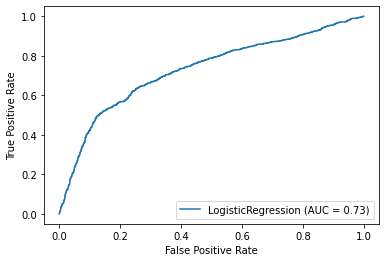

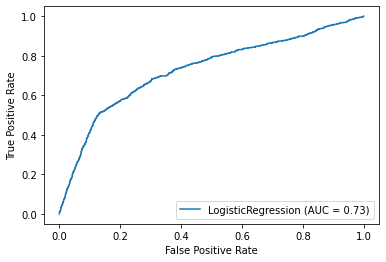

In [71]:
plot_roc_curve(logistic_model_SMOTE, X_test_tts, y_test_tts)
plot_roc_curve(logistic_model_upsample, X_test_tts, y_test_tts)

## 2. Decision Tree 

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

dt_accuracy_SMOTE = []
dt_train_accuracy_SMOTE = []
dt_accuracy_upsample = []
dt_train_accuracy_upsample = []

dt_score_SMOTE=[]
dt_score_upsample=[]

F1_d_tree_model_SMOTE = []
F1_d_tree_model_upsample =[]

In [73]:
d_tree_depth = range(1,15)

for d in d_tree_depth:
  #### 1. SMOTE
  d_tree_model_SMOTE = DecisionTreeClassifier(criterion="entropy", max_depth=d)
  d_tree_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

  y_hat_pred_SMOTE = d_tree_model_SMOTE.predict(X_test_tts)

  # Roc Auc SMOTE
  dt_score_SMOTE.append(roc_auc_score(y_test_tts, d_tree_model_SMOTE.predict_proba(X_test_tts)[:,1])) 

  # F1 score DT SMOTE
  F1_d_tree_model_SMOTE.append(f1_score(y_test_tts, y_hat_pred_SMOTE))
  

  #### 2. Upsample
  d_tree_model_upsample = DecisionTreeClassifier(criterion="entropy", max_depth=d)
  d_tree_model_upsample.fit(X_train_upsample, y_train_upsample)

  y_hat_pred_upsample = d_tree_model_upsample.predict(X_test_tts)

  # Roc Auc Upsample
  dt_score_upsample.append(roc_auc_score(y_test_tts, d_tree_model_upsample.predict_proba(X_test_tts)[:,1])) 

  # F1 score DT Upsample
  F1_d_tree_model_upsample.append(f1_score(y_test_tts, y_hat_pred_upsample))


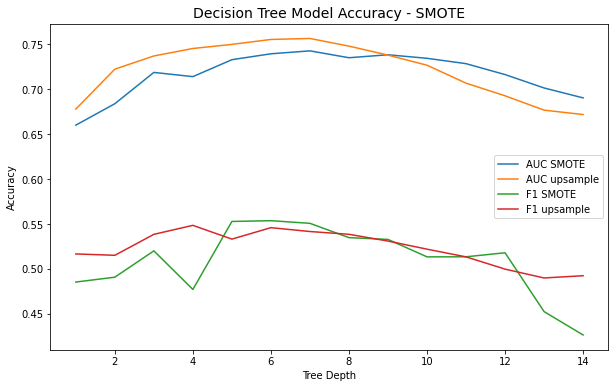

In [74]:
plt.figure(figsize=(10,6))
plt.plot(d_tree_depth, dt_score_SMOTE)
plt.plot(d_tree_depth, dt_score_upsample)
plt.plot(d_tree_depth, F1_d_tree_model_SMOTE)
plt.plot(d_tree_depth, F1_d_tree_model_upsample)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend(['AUC SMOTE', 'AUC upsample', 'F1 SMOTE', 'F1 upsample'])
plt.title('Decision Tree Model Accuracy - SMOTE', fontsize=14)
plt.show()

Best model is the one having Depth=6

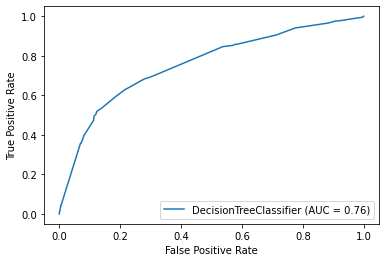

In [75]:
d_tree_model_best = DecisionTreeClassifier(criterion="entropy", max_depth=6)
d_tree_model_best.fit(X_train_upsample, y_train_upsample)

plot_roc_curve(d_tree_model_best, X_test_tts, y_test_tts)

## 3. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score

#### Grid Search
#### Final tuned parameters are close to this range:

max_depth=7 , max_leaf_nodes=19, min_samples_split=2, min_samples_leaf=11, n_estimators= 43, max_features = "sqrt"

In [77]:
# define model
model = RandomForestClassifier()

# define evaluation   
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# define search space
space = dict()
space['max_depth'] = range(5,10)
space['max_leaf_nodes'] = range(17,20)
space['min_samples_leaf'] = range(10,15)
space['n_estimators'] = range(40,45)
space['max_samples'] = [0.30]
space['max_features'] = ['sqrt']
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score)
}
space

{'max_depth': range(5, 10),
 'max_features': ['sqrt'],
 'max_leaf_nodes': range(17, 20),
 'max_samples': [0.3],
 'min_samples_leaf': range(10, 15),
 'n_estimators': range(40, 45)}

In [78]:
# define search
search = GridSearchCV(estimator=model, param_grid=space, scoring=scorers, n_jobs=-1, cv=cv, verbose=3, refit = 'f1_score')
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed: 10.9min finished


Best Score: 0.2847844112559379
Best Hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 18, 'max_samples': 0.3, 'min_samples_leaf': 13, 'n_estimators': 40}


In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model_SMOTE = RandomForestClassifier(bootstrap=True, max_depth=7 , max_leaf_nodes=19, min_samples_split=2, min_samples_leaf=14, n_estimators= 43, max_features = "sqrt")
rf_model_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

y_train_pred_SMOTE = rf_model_SMOTE.predict(X_train_SMOTE)
y_pred_SMOTE=rf_model_SMOTE.predict(X_test_tts)

f1_rf_train = f1_score(y_train_SMOTE, y_train_pred_SMOTE)
f1_rf_test = f1_score(y_test_tts, y_pred_SMOTE)

rf_score_train_SMOTE = roc_auc_score(y_train_SMOTE, rf_model_SMOTE.predict_proba(X_train_SMOTE)[:,1])
rf_score_SMOTE = roc_auc_score(y_test_tts, rf_model_SMOTE.predict_proba(X_test_tts)[:,1])

In [80]:
print('F1 Train', f1_rf_train)
print('F1 Test', f1_rf_test)

print('Auc_ Train', rf_score_train_SMOTE)
print('Auc Test', rf_score_SMOTE)

F1 Train 0.7942571010767936
F1 Test 0.5252317198764161
Auc_ Train 0.8722471137962006
Auc Test 0.7334698916512195


#### Test Data

Download test data provided by Kaggle and preprocess in the similar way

In [81]:
#https://drive.google.com/file/d/1tcUmQGe0GHDVTT_-OGUN4qD16F2d3Y8V/view?usp=sharing
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tcUmQGe0GHDVTT_-OGUN4qD16F2d3Y8V' -O hranalytics_solutions.npy
#https://drive.google.com/file/d/1EAjlxXF0nPe5iccoeKbr5IjHMkd_KFW5/view?usp=sharing
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EAjlxXF0nPe5iccoeKbr5IjHMkd_KFW5' -O hranalytics_test.csv
target_data = np.load('hranalytics_solutions.npy')
df_test = pd.read_csv('hranalytics_test.csv')

target_data

--2021-05-26 20:02:09--  https://docs.google.com/uc?export=download&id=1tcUmQGe0GHDVTT_-OGUN4qD16F2d3Y8V
Resolving docs.google.com (docs.google.com)... 108.177.12.100, 108.177.12.138, 108.177.12.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u67htsram43q11s4m5cjo15fk8ahcqtq/1622059275000/09624322204420852874/*/1tcUmQGe0GHDVTT_-OGUN4qD16F2d3Y8V?e=download [following]
--2021-05-26 20:02:09--  https://doc-14-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u67htsram43q11s4m5cjo15fk8ahcqtq/1622059275000/09624322204420852874/*/1tcUmQGe0GHDVTT_-OGUN4qD16F2d3Y8V?e=download
Resolving doc-14-54-docs.googleusercontent.com (doc-14-54-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-14-54-docs.googleusercontent.com (doc-14-54-

array([1., 0., 1., ..., 0., 0., 0.])

In [82]:
df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [83]:
df_test['gender'] = df_test['gender'].fillna('Undisclosed')

In [84]:
df_test["gender"].replace({"Other": "Diverse"}, inplace=True)

In [85]:
df_test['enrolled_university'] = df_test['enrolled_university'].fillna(df_test['enrolled_university'].mode().iloc[0])

In [86]:
df_test['education_level'] = df_test['education_level'].fillna(df_test['education_level'].mode().iloc[0])

In [87]:
df_test.rename(columns={'last_new_job' : 'current_jobexperience'}, inplace= True)

In [88]:
df_test[df_test['company_type'] == 'Pvt Ltd'].company_size.value_counts()

50-99        241
100-500      233
10000+       184
1000-4999    111
10/49        109
<10           96
500-999       68
5000-9999     50
Name: company_size, dtype: int64

In [89]:
df_test['company_size'] = df_test['company_size'].fillna(method='bfill')
df_test['company_size'] = df_test['company_size'].fillna(method='ffill')

In [90]:
df_test['company_type'] = df_test['company_type'].fillna(method='bfill')
df_test['company_type'] = df_test['company_type'].fillna(method='ffill')

In [91]:
df_test['experience'] = df_test['experience'].fillna(method='ffill')

In [92]:
df_test['current_jobexperience'] = df_test['current_jobexperience'].fillna(df_test.experience)

In [93]:
df_test['current_jobexperience'] = df_test['current_jobexperience'].fillna(df_test.experience)

In [94]:
df_test.loc[df_test['current_jobexperience']=='never', 'current_jobexperience'] = df_test['experience']

In [95]:
df_test.major_discipline = df_test.major_discipline.fillna(method = 'ffill')

In [96]:
df_test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
current_jobexperience     0
training_hours            0
dtype: int64

#### test data transformation
* One hot Encoding
* Label Encoding

In [97]:
dfDummies = pd.get_dummies(df_test['major_discipline'], prefix = 'MD')

In [98]:
df_test = pd.concat([df_test, dfDummies], axis=1)

In [99]:
dfDummies = pd.get_dummies(df_test['gender'], prefix = 'gender')
df_test = pd.concat([df_test, dfDummies], axis=1)

In [100]:
dfDummies = pd.get_dummies(df_test['enrolled_university'], prefix = 'EU')
df_test = pd.concat([df_test, dfDummies], axis=1)

In [101]:
dfDummies = pd.get_dummies(df_test['company_type'], prefix = 'CT')
df_test = pd.concat([df_test, dfDummies], axis=1)

In [102]:
# create a list of our conditions to fill new column Popularity
conditions = [
    (df_test['education_level'] == 'Primary School'),
    (df_test['education_level'] == 'High School'),
    (df_test['education_level'] == 'Graduate'),
    (df_test['education_level'] == 'Masters'),
    (df_test['education_level'] == 'Phd')
    ]
# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5]

# create a new column and use np.select to assign values to it using our lists as arguments
df_test['education_level'] = np.select(conditions, values)

In [103]:
# create a list of our conditions to fill new column Popularity
conditions = [
    (df_test['relevent_experience'] == 'No relevent experience'),
    (df_test['relevent_experience'] == 'Has relevent experience')
    ]
# create a list of the values we want to assign for each condition
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df_test['relevent_experience'] = np.select(conditions, values)

In [104]:
df_test.experience.replace({'<1': '0', '>20':'21'}, inplace=True)

In [105]:
df_test['experience'] = df_test['experience'].astype(str).astype(int)

In [106]:
df_test.current_jobexperience.replace({'<1': '0', '>20':'21', '>4':'5'}, inplace=True)

In [107]:
df_test['current_jobexperience'] = df_test['current_jobexperience'].astype(str).astype(int)

In [108]:
df_test.company_size.replace({'<10': '0', '10/49':'1', '50-99':'2', '100-500':'3', '500-999':'4', '1000-4999':'5', '5000-9999':'6', '10000+':'7'}, inplace=True)

In [109]:
df_test.company_size = df_test.company_size.astype(str).astype(int)

In [110]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,current_jobexperience,training_hours,MD_Arts,MD_Business Degree,MD_Humanities,MD_No Major,MD_Other,MD_STEM,gender_Diverse,gender_Female,gender_Male,gender_Undisclosed,EU_Full time course,EU_Part time course,EU_no_enrollment,CT_Early Stage Startup,CT_Funded Startup,CT_NGO,CT_Other,CT_Public Sector,CT_Pvt Ltd
0,32403,city_41,0.827,Male,1,Full time course,3,STEM,9,0,Pvt Ltd,1,21,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,9858,city_103,0.920,Female,1,no_enrollment,3,STEM,5,1,Pvt Ltd,1,98,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
2,31806,city_21,0.624,Male,0,no_enrollment,2,STEM,0,1,Pvt Ltd,0,15,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
3,27385,city_13,0.827,Male,1,no_enrollment,4,STEM,11,1,Pvt Ltd,1,39,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,27724,city_103,0.920,Male,1,no_enrollment,3,STEM,21,7,Pvt Ltd,5,72,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [111]:
X_kaggle_test = df_test.drop(['enrollee_id', 'city', 'gender', 'enrolled_university', 'major_discipline', 'company_type'], axis = 1)

## Model Selection and Evaluation

Decision tree with Depth 6 has performed best with AUC=0.76. 

Train the selected model on whole data(Train + Validation set)

> Upsampling the whole train data


In [112]:
# concatenate our training data back together
upsampled_df = pd.concat([X, y], axis=1)

# separate minority and majority classes
no_job_change = upsampled_df[upsampled_df.target==0]
job_change = upsampled_df[upsampled_df.target==1]

# upsample minority
job_change_upsample = resample(job_change,
                          replace=True, # sample with replacement
                          n_samples=len(no_job_change), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_final = pd.concat([no_job_change, job_change_upsample])

# check new class counts
upsampled_final.target.value_counts()

1.0    14371
0.0    14371
Name: target, dtype: int64

In [113]:
X_upsampled_final = upsampled_final.drop(['target'], axis=1)
y_upsampled_final = upsampled_final.target

#### Decision Tree with depth = 6 with upsampled data


Area Under Curve of Decision Tree: 0.7387795574873005
F1 score: 0.5513108614232209


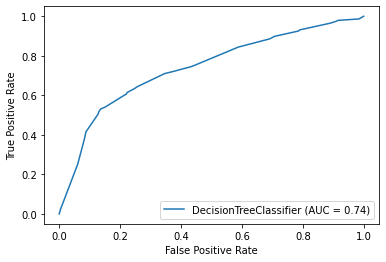

In [114]:
# Upsample
d_tree_model_final = DecisionTreeClassifier(criterion="entropy", max_depth=6)
d_tree_model_final.fit(X_upsampled_final, y_upsampled_final)

y_pred_dt = d_tree_model_final.predict(X_kaggle_test)
dt_accuracy_final = metrics.f1_score(target_data, y_pred_dt)

print('Area Under Curve of Decision Tree:', roc_auc_score(target_data, d_tree_model_final.predict_proba(X_kaggle_test)[:,1]))
print('F1 score:', dt_accuracy_final)

plot_roc_curve(d_tree_model_final, X_kaggle_test, target_data)